In [10]:
# importing functions
import pandas as pd
import matplotlib.pyplot as mp

In [11]:
# dividing the data
data=pd.read_csv("CarPrice_Assignment.csv")
x=len(data)
s=int(0.8*x)
tr=data.loc[1:s,:]
te=data.loc[s:,:]


In [12]:
# cost function
def cos(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])**2
  return j/(s)

In [13]:
# gradient functions
def grad1(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])*(tr.carlength[i])
  return 2*j/s
def grad2(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])*(tr.horsepower[i])
  return 2*j/s
def grad3(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])*(tr.enginesize[i])
  return 2*j/s
def grad4(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])*(tr.carheight[i])
  return 2*j/s
def grad5(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])*(tr.carwidth[i])
  return 2*j/s
def grad6(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])*(tr.stroke[i])
  return 2*j/s
def grad7(w1,w2,w3,w4,w5,w6,w7):
  j=0
  for i in range(1,s):
    j=j+ (w1*tr.carlength[i]+w2*tr.horsepower[i]+w3*tr.enginesize[i]+w4*tr.carheight[i]+w5*tr.carwidth[i]+w6*tr.stroke[i]+w7-tr.price[i])
  return 2*j/s

-10.363454965943554 62.200918039823065 125.2470435037311 -45.10847616965089 -69.36935810972021 -8.958996455305037 -1.8534681285622945


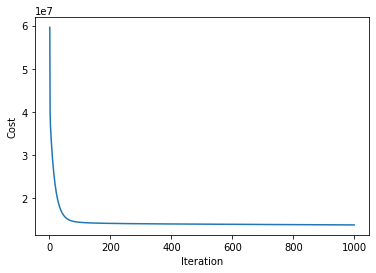

In [36]:
# training
w1=w2=w3=w4=w5=w6=w7=0
a=0.00001
it=[]
cost=[]

for i in range(1,1000):
 ww1=w1-a*grad1(w1,w2,w3,w4,w5,w6,w7)
 ww2=w2-a*grad2(w1,w2,w3,w4,w5,w6,w7)
 ww3=w3-a*grad3(w1,w2,w3,w4,w5,w6,w7)
 ww4=w4-a*grad4(w1,w2,w3,w4,w5,w6,w7)
 ww5=w5-a*grad5(w1,w2,w3,w4,w5,w6,w7)
 ww6=w6-a*grad6(w1,w2,w3,w4,w5,w6,w7)
 ww7=w7-a*grad7(w1,w2,w3,w4,w5,w6,w7)
 w1=ww1
 w2=ww2
 w3=ww3
 w4=ww4
 w5=ww5
 w6=ww6
 w7=ww7
 it.append(i)
 cost.append(cos(w1,w2,w3,w4,w5,w6,w7))
mp.plot(it,cost)
mp.xlabel("Iteration")
mp.ylabel("Cost")
print(w1,w2,w3,w4,w5,w6,w7) 


In [37]:
# Testing 
k=0
for i in range(s+1,x):
 k=k+abs(w1*te.carlength[i]+w2*te.horsepower[i]+w3*te.enginesize[i]+w4*te.carheight[i]+w5*te.carwidth[i]+w6*te.stroke[i]+w7-te.price[i])
k=k/x-s
print("The mean deviation is ",k)
v=0
for i in range(s+1,x):
 v=v+(k-abs(w1*te.carlength[i]+w2*te.horsepower[i]+w3*te.enginesize[i]+w4*te.carheight[i]+w5*te.carwidth[i]+w6*te.stroke[i]+w7-te.price[i]))**2
v=(v/(x-s))**0.5
print("The SD of deviations is",v)

The mean deviation is  412.64737632811944
The SD of deviations is 3448.8825171237295


In [38]:
# Price of Ishan's car
carlength = 190.9
carwidth =70.3
carheight = 54.9
enginesize = 183
stroke = 3.64
horsepower = 123
print("The estimated price for the given features  is ",w1*carlength+w2*horsepower+w3*enginesize+w4*carheight+w5*carwidth+w6*stroke+w7)

The estimated price for the given features  is  21204.952895029368
